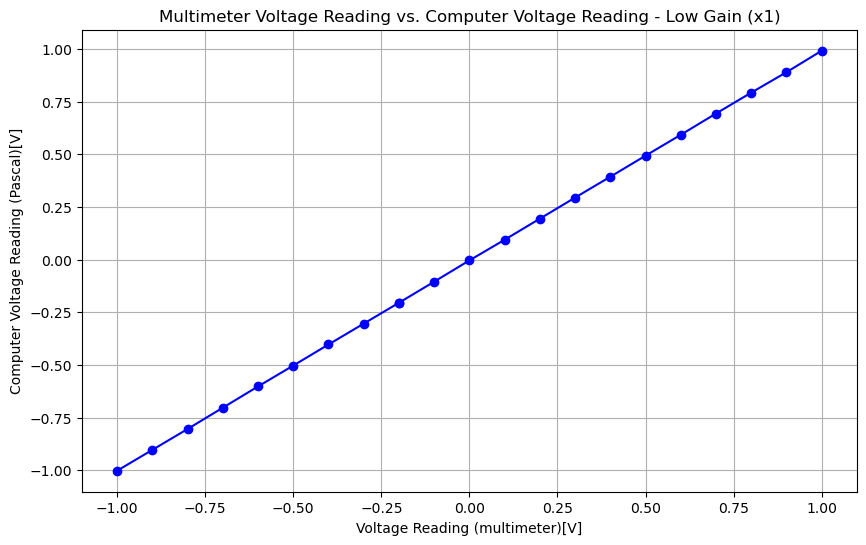

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# collected data 
data = {
    "Voltage Reading (multimeter)": [-1.000, -0.900, -0.800, -0.700, -0.600, -0.500, -0.400, -0.300, -0.200, -0.200, -0.100, 0.000, 0.100, 0.200, 0.300, 0.400, 0.500, 0.600, 0.700, 0.800, 0.900, 1.000],
    "Computer Voltage Reading (Pascal)": [-1.002, -0.903, -0.804, -0.703, -0.602, -0.503, -0.403, -0.304, -0.205, -0.205, -0.105, -0.004, 0.094, 0.194, 0.294, 0.393, 0.493, 0.592, 0.693, 0.792, 0.889, 0.991],
}

# DataFrame
df = pd.DataFrame(data)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Voltage Reading (multimeter)'], df['Computer Voltage Reading (Pascal)'], marker='o', linestyle='-', color='blue')
plt.xlabel('Voltage Reading (multimeter)[V]')
plt.ylabel('Computer Voltage Reading (Pascal)[V]')
plt.title('Multimeter Voltage Reading vs. Computer Voltage Reading - Low Gain (x1)')
plt.grid(True)
plt.savefig("T1.png", dpi=500)
plt.show()


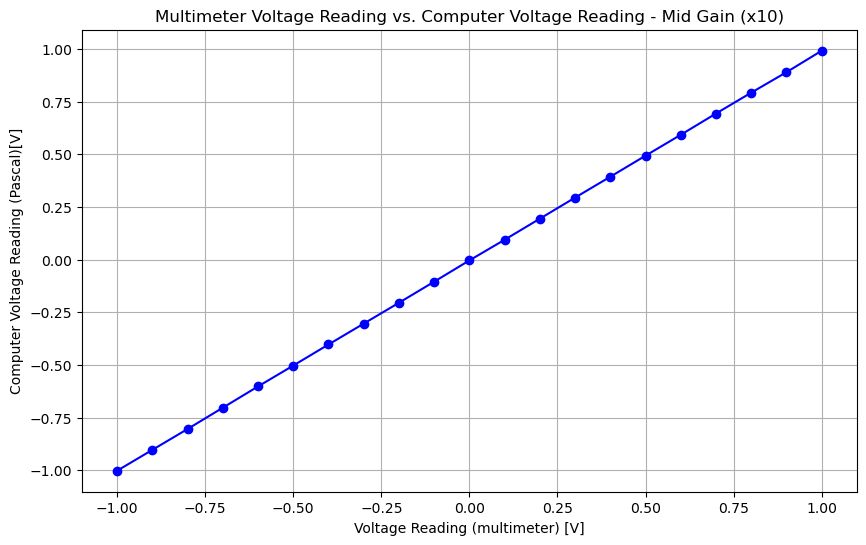

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

#  collected data
new_data = {
    "Voltage Reading (multimeter)":      [-1.000, -0.900, -0.800, -0.700, -0.600, -0.500, -0.400, -0.300, -0.200, -0.100, 0.000, 0.100, 0.200, 0.300, 0.400, 0.500, 0.600, 0.700, 0.800, 0.900, 1.000],
    "Computer Voltage Reading (Pascal)": [-1.002, -0.903, -0.804, -0.703, -0.602, -0.503, -0.403, -0.304, -0.205, -0.105, -0.004, 0.094, 0.194, 0.294, 0.393, 0.493, 0.592, 0.693, 0.792, 0.889, 0.991],
}

# DataFrame
new_df = pd.DataFrame(new_data)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(new_df['Voltage Reading (multimeter)'], new_df['Computer Voltage Reading (Pascal)'], marker='o', linestyle='-', color='blue')
plt.xlabel('Voltage Reading (multimeter) [V]')
plt.ylabel('Computer Voltage Reading (Pascal)[V]')
plt.title('Multimeter Voltage Reading vs. Computer Voltage Reading - Mid Gain (x10)')
plt.grid(True)
plt.savefig("T2.png", dpi=500)
plt.show()


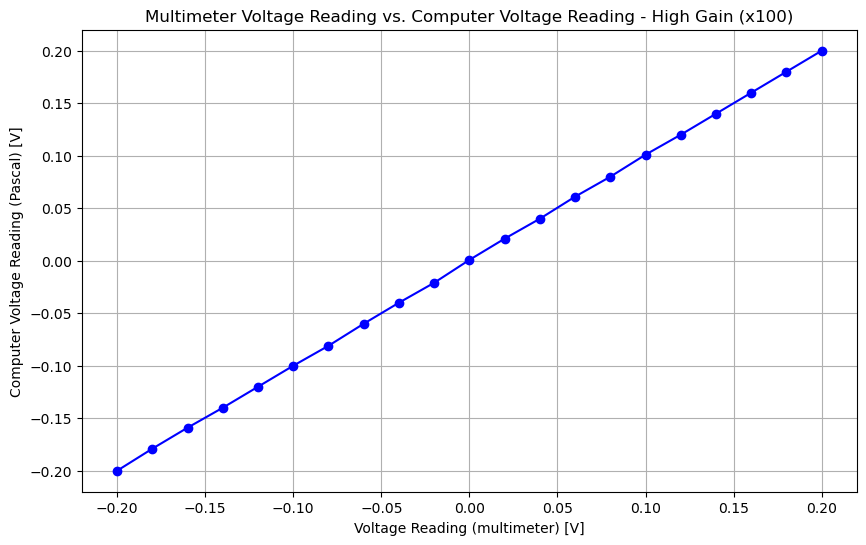

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Data extracted from the latest image
new_data_3 = {
    "Voltage Reading (multimeter) [V]": [-0.2, -0.18, -0.16, -0.14, -0.12, -0.1, -0.08, -0.06, -0.04, -0.02, 0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2],
    "Computer Voltage Reading (Pascal) [V]": [-0.2, -0.179, -0.159, -0.14, -0.12, -0.1, -0.081, -0.06, -0.04, -0.021, 0.00078, 0.021, 0.04, 0.061, 0.08, 0.101, 0.12, 0.14, 0.16, 0.18, 0.2],
}

# Creating a DataFrame
new_df_3 = pd.DataFrame(new_data_3)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(new_df_3['Voltage Reading (multimeter) [V]'], new_df_3['Computer Voltage Reading (Pascal) [V]'], marker='o', linestyle='-', color='blue')
plt.xlabel('Voltage Reading (multimeter) [V]')
plt.ylabel('Computer Voltage Reading (Pascal) [V]')
plt.title('Multimeter Voltage Reading vs. Computer Voltage Reading - High Gain (x100)')
plt.grid(True)
plt.savefig("T3.png", dpi=500)
plt.show()


Fitted parameters: A = 78.87, B = 33.10, V0 = 0.84


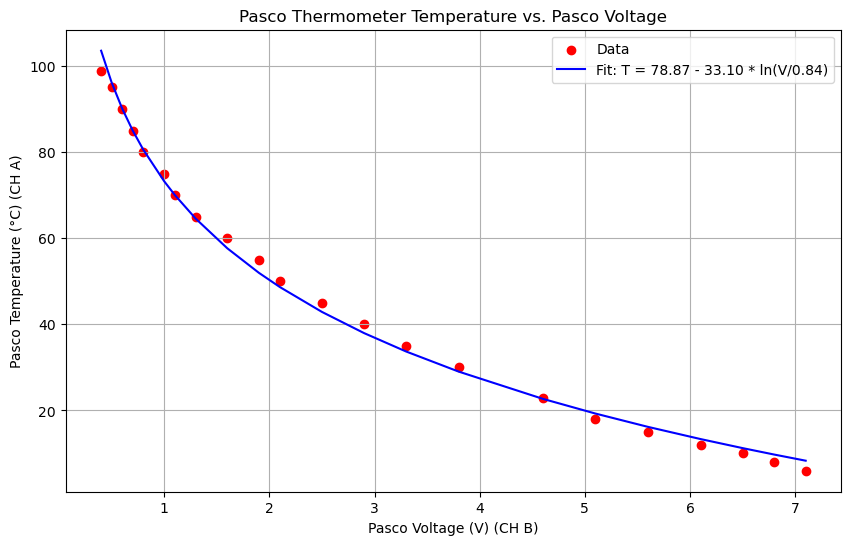

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
pasco_temp = np.array([6, 8, 10, 12, 15, 18, 23, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 98.9])
pasco_voltage = np.array([7.1, 6.8, 6.5, 6.1, 5.6, 5.1, 4.6, 3.8, 3.3, 2.9, 2.5, 2.1, 1.9, 1.6, 1.3, 1.1, 1, 0.8, 0.7, 0.6, 0.5, 0.4])

# Define the calibration curve function
def calibration_curve(V, A, B, V0):
    return A - B * np.log(V / V0)

# Initial guess for the parameters
initial_guess = [100, 50, 1]

# Fit the curve
popt, pcov = curve_fit(calibration_curve, pasco_voltage, pasco_temp, p0=initial_guess)

# Extract fitted parameters
A, B, V0 = popt

# Generate data for the fitted curve
fitted_temp = calibration_curve(pasco_voltage, A, B, V0)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(pasco_voltage, pasco_temp, label='Data', color='red')
plt.plot(pasco_voltage, fitted_temp, label=f'Fit: T = {A:.2f} - {B:.2f} * ln(V/{V0:.2f})', color='blue')
plt.xlabel('Pasco Voltage (V) (CH B)')
plt.ylabel('Pasco Temperature (°C) (CH A)')
plt.title('Pasco Thermometer Temperature vs. Pasco Voltage')
plt.legend()
plt.grid(True)
print(f'Fitted parameters: A = {A:.2f}, B = {B:.2f}, V0 = {V0:.2f}')
plt.savefig("T4.png", dpi=500)
plt.show()



In [43]:
# data
pasco_voltage = np.array([7.1, 6.8, 6.5, 6.1, 5.6, 5.1, 4.6, 3.8, 3.3, 2.9, 2.5, 2.1, 1.9, 1.6, 1.3, 1.1, 1, 0.8, 0.7, 0.6, 0.5, 0.4])

# calculate calibrated temperatures
calibrated_temp = calibration_curve(pasco_voltage, A, B, V0)

# DataFrame
data = {
    'Pasco Voltage (V) (CH B)': pasco_voltage,
    'Calibrated Temperature (°C)': calibrated_temp
}

df = pd.DataFrame(data)
df


,Pasco Voltage (V) (CH B),Calibrated Temperature (°C)
0,7.1,8.219766
1,6.8,9.648764
2,6.5,11.142251
3,6.1,13.244545
4,5.6,16.075329
5,5.1,19.171041
6,4.6,22.586439
7,3.8,28.910368
8,3.3,33.580069
9,2.9,37.856977


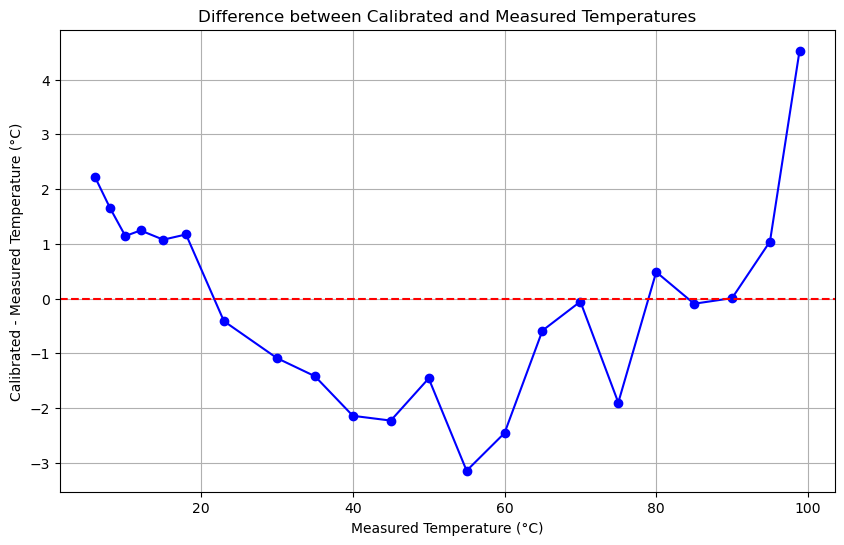

array([ 2.21976553,  1.64876442,  1.14225083,  1.24454456,  1.0753285 ,
        1.17104102, -0.41356076, -1.08963242, -1.41993082, -2.14302251,
       -2.23032034, -1.45922323, -3.14646075, -2.45821724, -0.58535427,
       -0.05586407, -1.90109711,  0.48495443, -0.09515647,  0.00723103,
        1.04207456,  4.52812611])

In [46]:
# measured temperatures from pasco value (CH A)
measured_temp = np.array([6, 8, 10, 12, 15, 18, 23, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 98.9])

# calculating the difference
temp_difference = calibrated_temp - measured_temp

# plotting the difference
plt.figure(figsize=(10, 6))
plt.plot(measured_temp, temp_difference, marker='o', linestyle='-', color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Measured Temperature (°C)')
plt.ylabel('Calibrated - Measured Temperature (°C)')
plt.title('Difference between Calibrated and Measured Temperatures')
plt.grid(True)
plt.savefig("T5.png", dpi=500)
plt.show()

# check for systematic deviations
temp_difference


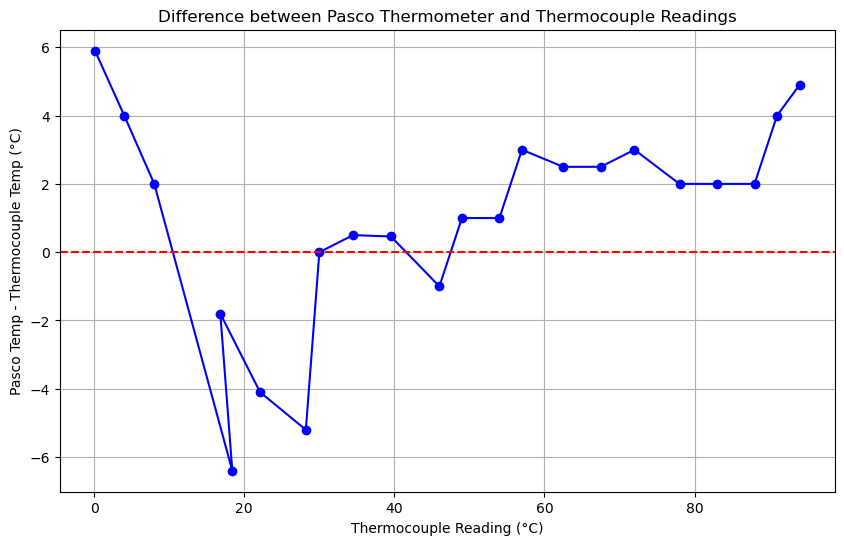

array([ 5.9 ,  4.  ,  2.  , -6.4 , -1.8 , -4.1 , -5.2 ,  0.  ,  0.5 ,
        0.46, -1.  ,  1.  ,  1.  ,  3.  ,  2.5 ,  2.5 ,  3.  ,  2.  ,
        2.  ,  2.  ,  4.  ,  4.9 ])

In [49]:
# data
thermocouple_temp = np.array([0.1, 4, 8, 18.4, 16.8, 22.1, 28.2, 30, 34.5, 39.54, 46, 49, 54, 57, 62.5, 67.5, 72, 78, 83, 88, 91, 94])
pasco_temp = np.array([6, 8, 10, 12, 15, 18, 23, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 98.9])

# calculating the difference
temp_difference = pasco_temp - thermocouple_temp

# ploting the difference
plt.figure(figsize=(10, 6))
plt.plot(thermocouple_temp, temp_difference, marker='o', linestyle='-', color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Thermocouple Reading (°C)')
plt.ylabel('Pasco Temp - Thermocouple Temp (°C)')
plt.title('Difference between Pasco Thermometer and Thermocouple Readings')
plt.grid(True)
plt.savefig("T6.png", dpi=500)
plt.show()
# check for systematic deviations
temp_difference
